In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
from pathlib import Path


2024-10-27 19:36:33.998758: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 19:36:34.680100: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 19:36:35.359816: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 19:36:35.948874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 19:36:36.108301: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 19:36:37.092120: I tensorflow/core/platform/cpu_feature_gu

In [2]:
data_train_path = './Fruits_Vegetables/train'
data_test_path = './Fruits_Vegetables/test'
data_val_path = './Fruits_Vegetables/validation'

In [3]:
# Set image dimensions and batch size
img_height, img_width = 180, 180
batch_size = 32

In [4]:
# Load and preprocess datasets
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True)

Found 334 files belonging to 4 classes.


In [5]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

Found 334 files belonging to 4 classes.


In [6]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

Found 334 files belonging to 4 classes.


In [7]:
# Get the class names (categories) from the dataset
data_cat = data_train.class_names
print(f"Categories: {data_cat}")

Categories: ['lemon', 'lettuce', 'mango', 'orange']


2024-10-27 19:37:14.296166: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36000000 exceeds 10% of free system memory.
2024-10-27 19:37:14.530658: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 42474300 exceeds 10% of free system memory.
2024-10-27 19:37:15.987388: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


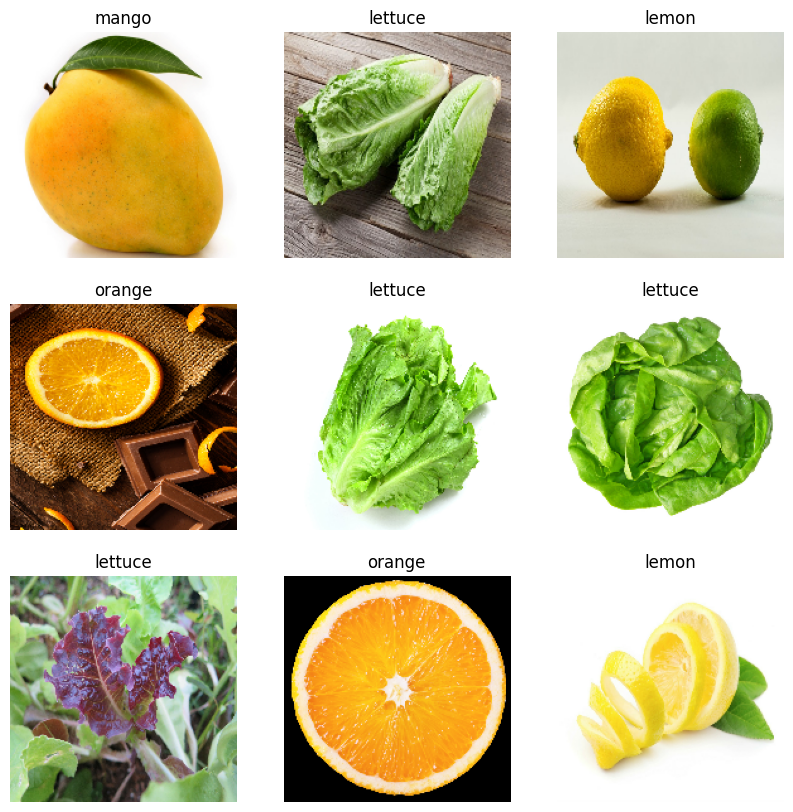

In [8]:
# Visualize a few training images
plt.figure(figsize=(10, 10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")
plt.show()

In [9]:
# Build the CNN model
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat))
])

/home/youssef/Desktop/classification-image/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# Train the model
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2024-10-27 19:37:37.197006: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 29942784 exceeds 10% of free system memory.
2024-10-27 19:37:37.334528: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30108672 exceeds 10% of free system memory.
2024-10-27 19:37:37.475331: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 56332986 exceeds 10% of free system memory.


 2/11 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.2344 - loss: 1.9860  

2024-10-27 19:37:46.573658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2618 - loss: 1.9538

2024-10-27 19:38:14.345473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.2652 - loss: 1.9311 - val_accuracy: 0.4820 - val_loss: 1.1880
Epoch 2/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 5:13 31s/step - accuracy: 0.5312 - loss: 1.1777

2024-10-27 19:39:03.981226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5354 - loss: 1.0969

2024-10-27 19:39:22.003084: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5369 - loss: 1.0924 - val_accuracy: 0.6317 - val_loss: 0.8648
Epoch 3/25
 5/11 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6747 - loss: 0.8354

2024-10-27 19:39:36.152994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6843 - loss: 0.8146

2024-10-27 19:39:54.467147: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6849 - loss: 0.8144 - val_accuracy: 0.6886 - val_loss: 0.7778
Epoch 4/25


2024-10-27 19:40:06.174051: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7196 - loss: 0.7572

2024-10-27 19:40:39.488949: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.7190 - loss: 0.7561 - val_accuracy: 0.8024 - val_loss: 0.5838
Epoch 5/25


2024-10-27 19:41:28.127493: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8145 - loss: 0.5457

2024-10-27 19:41:59.490484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.8127 - loss: 0.5465 - val_accuracy: 0.8443 - val_loss: 0.4559
Epoch 6/25


2024-10-27 19:42:53.015948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8335 - loss: 0.5016

2024-10-27 19:43:19.201557: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.8329 - loss: 0.5004 - val_accuracy: 0.8234 - val_loss: 0.4105
Epoch 7/25


2024-10-27 19:43:30.647274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8697 - loss: 0.3991

2024-10-27 19:44:04.468535: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.8693 - loss: 0.3968 - val_accuracy: 0.8713 - val_loss: 0.3451
Epoch 8/25
 4/11 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9010 - loss: 0.2696

2024-10-27 19:45:06.044426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8834 - loss: 0.3010

2024-10-27 19:45:26.544616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.8833 - loss: 0.3030 - val_accuracy: 0.9162 - val_loss: 0.2659
Epoch 9/25
 4/11 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9323 - loss: 0.2868

2024-10-27 19:46:28.766829: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9238 - loss: 0.2756

2024-10-27 19:46:46.475485: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.9239 - loss: 0.2736 - val_accuracy: 0.9102 - val_loss: 0.2064
Epoch 10/25
 6/11 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9332 - loss: 0.2133

2024-10-27 19:47:26.142061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9358 - loss: 0.2017

2024-10-27 19:47:39.413681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.9361 - loss: 0.2000 - val_accuracy: 0.9641 - val_loss: 0.1222
Epoch 11/25
 3/11 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9688 - loss: 0.1185

2024-10-27 19:48:35.239005: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9639 - loss: 0.1271

2024-10-27 19:48:47.077673: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9642 - loss: 0.1270 - val_accuracy: 0.9551 - val_loss: 0.1159
Epoch 12/25
 4/11 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9440 - loss: 0.1531

2024-10-27 19:49:06.217789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9543 - loss: 0.1370

2024-10-27 19:49:17.861390: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9557 - loss: 0.1349 - val_accuracy: 0.9790 - val_loss: 0.0806
Epoch 13/25
 5/11 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9667 - loss: 0.0788

2024-10-27 19:49:38.936965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9729 - loss: 0.0750

2024-10-27 19:49:49.901087: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.9734 - loss: 0.0746 - val_accuracy: 0.9850 - val_loss: 0.0623
Epoch 14/25


2024-10-27 19:50:08.137344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9887 - loss: 0.0563

2024-10-27 19:50:29.602024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.9889 - loss: 0.0559 - val_accuracy: 0.9940 - val_loss: 0.0313
Epoch 15/25


2024-10-27 19:50:50.452760: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9919 - loss: 0.0427

2024-10-27 19:51:10.978828: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9919 - loss: 0.0426 - val_accuracy: 0.9970 - val_loss: 0.0186
Epoch 16/25


2024-10-27 19:51:30.117741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9942 - loss: 0.0208

2024-10-27 19:51:53.634715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9945 - loss: 0.0204 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 17/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 0.0193

2024-10-27 19:52:08.503891: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0134

2024-10-27 19:52:25.235185: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 18/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 0.0047

2024-10-27 19:52:39.887802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.0052

2024-10-27 19:52:53.005323: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 19/25
 1/11 ━━━━━━━━━━━━━━━━━━━━ 3:03 18s/step - accuracy: 1.0000 - loss: 0.0034

2024-10-27 19:53:18.110188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0036

2024-10-27 19:53:35.030730: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 20/25


2024-10-27 19:53:44.203275: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0019

2024-10-27 19:54:05.365922: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 21/25


2024-10-27 19:54:15.228160: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0015

2024-10-27 19:54:44.910415: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 22/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 1.0000 - loss: 8.4195e-04

2024-10-27 19:55:11.931309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0013

2024-10-27 19:55:37.214514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 23/25


2024-10-27 19:55:57.810270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0015

2024-10-27 19:56:30.027380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 8.8992e-04
Epoch 24/25
 2/11 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 1.0000 - loss: 0.0014  

2024-10-27 19:57:25.531682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 1.0000 - loss: 0.0012

2024-10-27 19:57:40.349897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 7.5822e-04
Epoch 25/25
 5/11 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.0012

2024-10-27 19:58:14.016784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 1.0000 - loss: 0.0010

2024-10-27 19:58:32.215926: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 1.0000 - loss: 9.8664e-04 - val_accuracy: 1.0000 - val_loss: 6.6513e-04


In [12]:
# Plot training and validation accuracy and loss
epochs_range = range(epochs_size)
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Accuracy')

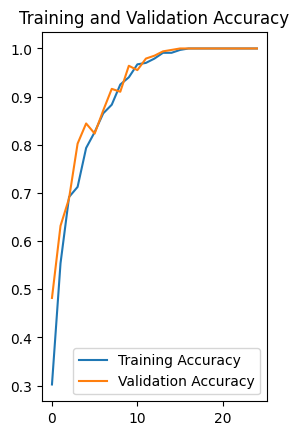

In [13]:
# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

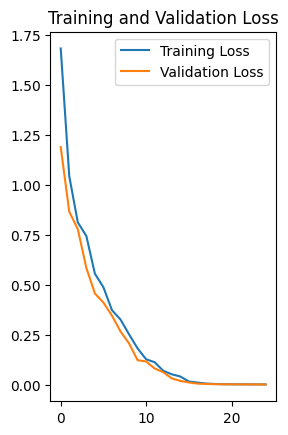

In [14]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Save the trained model
model.save('Image_classify.keras')
print("Model saved as 'Image_classify.keras'")